In [1]:
from resnet3d import Resnet3DBuilder
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from keras_radam import RAdam
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
x_train = np.load("x_train_3D.npy")
y_train = np.load("y_train_clef.npy")

x_train.shape, y_train.shape

((218, 128, 128, 32, 1), (218, 2))

In [3]:
opt = RAdam() #1e-3, 1e-5

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model = Resnet3DBuilder.build_resnet_50((128, 128, 32, 1), 2)
model.compile(optimizer=optimizers.Adam(lr=1e-3), # 'adam'
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 32, 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 64, 64, 16, 6 22016       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 16, 6 256         conv3d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 64, 64, 16, 6 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

(128, 128, 1)


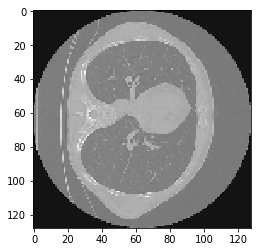

In [5]:
img = x_train[0][:,:,10]
print(img.shape)
plt.imshow(np.reshape(img, (x_train.shape[1], x_train.shape[1])), cmap='gray')

In [6]:
max(img.flatten()), min(img.flatten())

(1.0, 0.0)

In [7]:
x_train.shape, y_train.shape

((218, 128, 128, 32, 1), (218, 2))

In [8]:
checkpointer = ModelCheckpoint(filepath='resnet.h5', verbose=1, save_best_only=True)
h = model.fit(x_train, y_train, validation_split=0.1, batch_size=6, epochs=300, callbacks=[checkpointer])

Instructions for updating:
Use tf.cast instead.
Train on 196 samples, validate on 22 samples
Epoch 1/300
196/196 [==============================] - 48s 245ms/step - loss: 6.0669 - acc: 0.5102 - val_loss: 5.6068 - val_acc: 0.4545

Epoch 00001: val_loss improved from inf to 5.60685, saving model to resnet.h5
Epoch 2/300
196/196 [==============================] - 23s 117ms/step - loss: 5.3500 - acc: 0.5510 - val_loss: 5.0588 - val_acc: 0.5000

Epoch 00002: val_loss improved from 5.60685 to 5.05876, saving model to resnet.h5
Epoch 3/300
196/196 [==============================] - 23s 116ms/step - loss: 4.9041 - acc: 0.5714 - val_loss: 4.6746 - val_acc: 0.4545

Epoch 00003: val_loss improved from 5.05876 to 4.67460, saving model to resnet.h5
Epoch 4/300
196/196 [==============================] - 23s 117ms/step - loss: 4.4816 - acc: 0.5510 - val_loss: 4.5092 - val_acc: 0.5000

Epoch 00004: val_loss improved from 4.67460 to 4.50918, saving model to resnet.h5
Epoch 5/300
196/196 [==============

In [9]:
#model.save("resnet3D_exp1.h5")

In [10]:
def plot_loss_accu(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'g')
    plt.plot(epochs, val_loss, 'y')
    plt.title('Training loss')
    plt.legend(['train', 'val'], loc='upper right')
    plt.grid()
    plt.show()
    loss = history.history['acc']
    val_loss = history.history['val_acc']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'r')
    plt.plot(epochs, val_loss, 'b')
    plt.title('Training accuracy')
    plt.legend(['train', 'val'], loc='lower right')
    plt.grid()
    plt.show()

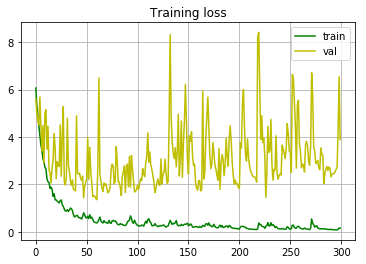

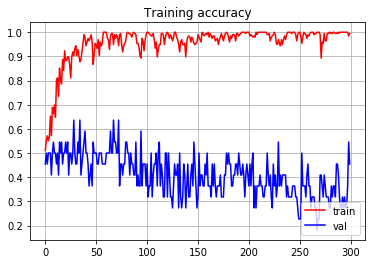

In [11]:
plot_loss_accu(h) 